In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('crime_data.csv')

In [3]:
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


# `EDA`

In [4]:
df.rename({'Unnamed: 0':'State'},axis=1,inplace=True)

In [5]:
df.head()

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [6]:
df1=df.drop('State',axis=1)

In [7]:
df1.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


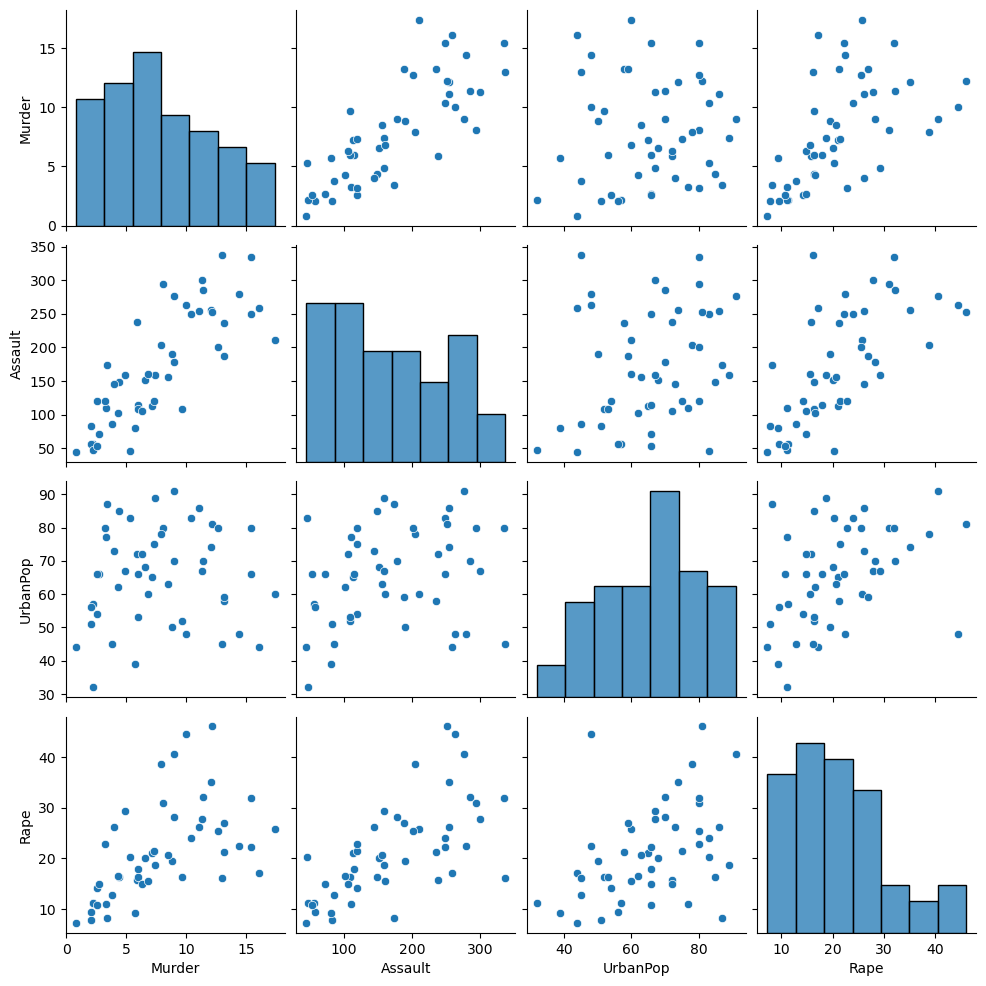

In [9]:
sns.pairplot(data=df1)

<Axes: >

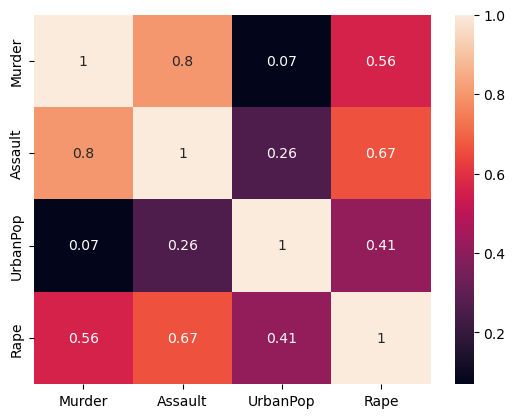

In [11]:
sns.heatmap(df1.corr(),annot=True)

# `Applying MinMaxScaler`

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
scaler=MinMaxScaler()
scaled_df1=scaler.fit_transform(df1)

In [15]:
pd.DataFrame(scaled_df1,columns=df.columns[1:])

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


# `Heirarchial Clustering`

In [17]:
from sklearn.cluster import AgglomerativeClustering

In [18]:
hc=AgglomerativeClustering(n_clusters=2,linkage='average')

In [19]:
print(hc.fit(scaled_df1))

AgglomerativeClustering(linkage='average')


In [20]:
hc_pred=hc.fit_predict(scaled_df1)

In [21]:
df['Cluster No']=pd.DataFrame(hc_pred,columns=['Cluster No'])

In [22]:
from sklearn.metrics import silhouette_score

In [23]:
silhouette_score(scaled_df1,hc.fit_predict(scaled_df1))

0.42364457559625074

In [24]:
import scipy.cluster.hierarchy as sch

In [25]:
sch.linkage(scaled_df1,optimal_ordering=False,method='average')

array([[1.40000000e+01, 2.80000000e+01, 4.99862313e-02, 2.00000000e+00],
       [1.20000000e+01, 3.10000000e+01, 8.71860232e-02, 2.00000000e+00],
       [1.30000000e+01, 1.50000000e+01, 1.07560045e-01, 2.00000000e+00],
       [2.20000000e+01, 4.80000000e+01, 1.24475500e-01, 2.00000000e+00],
       [1.90000000e+01, 3.00000000e+01, 1.32688717e-01, 2.00000000e+00],
       [3.50000000e+01, 4.50000000e+01, 1.44578065e-01, 2.00000000e+00],
       [1.80000000e+01, 5.00000000e+01, 1.47589801e-01, 3.00000000e+00],
       [3.60000000e+01, 4.60000000e+01, 1.48312560e-01, 2.00000000e+00],
       [3.70000000e+01, 5.20000000e+01, 1.70146620e-01, 3.00000000e+00],
       [4.90000000e+01, 5.50000000e+01, 1.77973356e-01, 3.00000000e+00],
       [4.00000000e+01, 4.70000000e+01, 1.78647476e-01, 2.00000000e+00],
       [2.50000000e+01, 2.60000000e+01, 1.85305888e-01, 2.00000000e+00],
       [3.40000000e+01, 5.80000000e+01, 1.85551981e-01, 4.00000000e+00],
       [0.00000000e+00, 1.70000000e+01, 1.96467627e

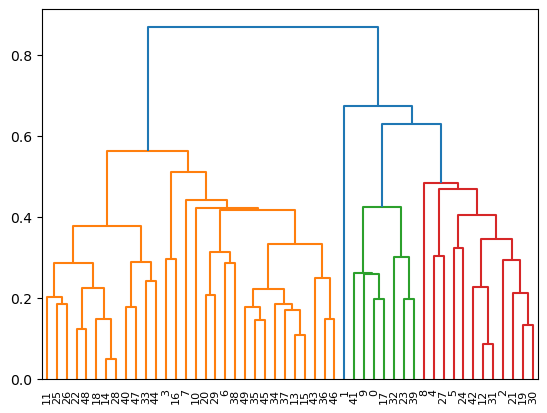

In [26]:
sch.dendrogram(sch.linkage(scaled_df1,optimal_ordering=False,method='average'))
plt.show()